In [3]:
#Constructing word clouds for raw reviews and extracted reviews for comparison
from pathlib import Path
import pandas as pd
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import matplotlib.pyplot as plt


In [4]:
# read in cleaned CSV
filepath = Path('massive.csv')
massive = pd.read_csv(filepath)
massive = massive.sample(n=1000)

In [5]:
lemmatizer = WordNetLemmatizer()

In [13]:
# add frequently used movie-related words to stopwords 
# custom_stop_words = ['movie', 'film', 'story', 'character', 'make']
# [stopwords.add(n) for n in custom_stop_words] 

sw_addon = {'movie', 'film', 'story', 'character', 'make', 'one', 'even', 'ha'} 
sw = set(stopwords.words('english'))
sw = sw.union(sw_addon)

In [14]:
def process_text(doc):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [15]:
# Process text for wordcloud creation
big_string = ' '.join(massive['reviewText'])
input_text = process_text(big_string)

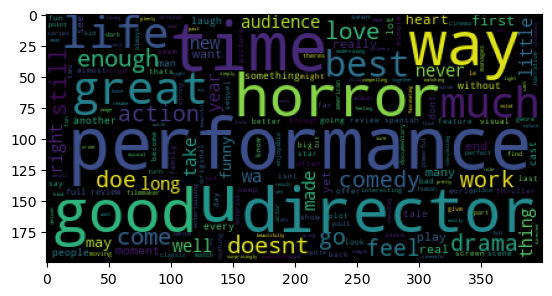

In [16]:
wc = WordCloud().generate(input_text)
plt.imshow(wc)